In [46]:
import numpy as np
import pandas as pd
edges_df_cluster1 = pd.read_csv('edges_PD_cluster1_allpatients.csv', sep = '\t')
edges_df_cluster2 = pd.read_csv('edges_PD_cluster2_allpatients.csv', sep = '\t')
edges_df_cluster3 = pd.read_csv('edges_PD_cluster3_allpatients.csv', sep = '\t')

# Store the DataFrames in a list with labels
clusters = {
    'cluster1': edges_df_cluster1,
    'cluster2': edges_df_cluster2,
    'cluster3': edges_df_cluster3
}

# Prepare a list to store the results
results = []

for name, df in clusters.items():
    data = df['weight']
    median = np.median(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    iqr = q3 - q1

    results.append({
        'Cluster': name,
        'Median': median,
        'Q1': q1,
        'Q3': q3,
        'IQR': iqr
    })

# Convert to a new DataFrame
summary_df = pd.DataFrame(results)

summary_df

,Cluster,Median,Q1,Q3,IQR
0,cluster1,10.475669,7.725445,14.940988,7.215543
1,cluster2,10.171165,7.853009,14.279967,6.426959
2,cluster3,9.846239,7.605234,13.831528,6.226294


In [50]:
edges_df_cluster1['abundance_mean'] = edges_df_cluster1['start'].map(mean_abundance)

In [51]:
mean_abundance = relative_abundance.mean(axis=1).to_dict()

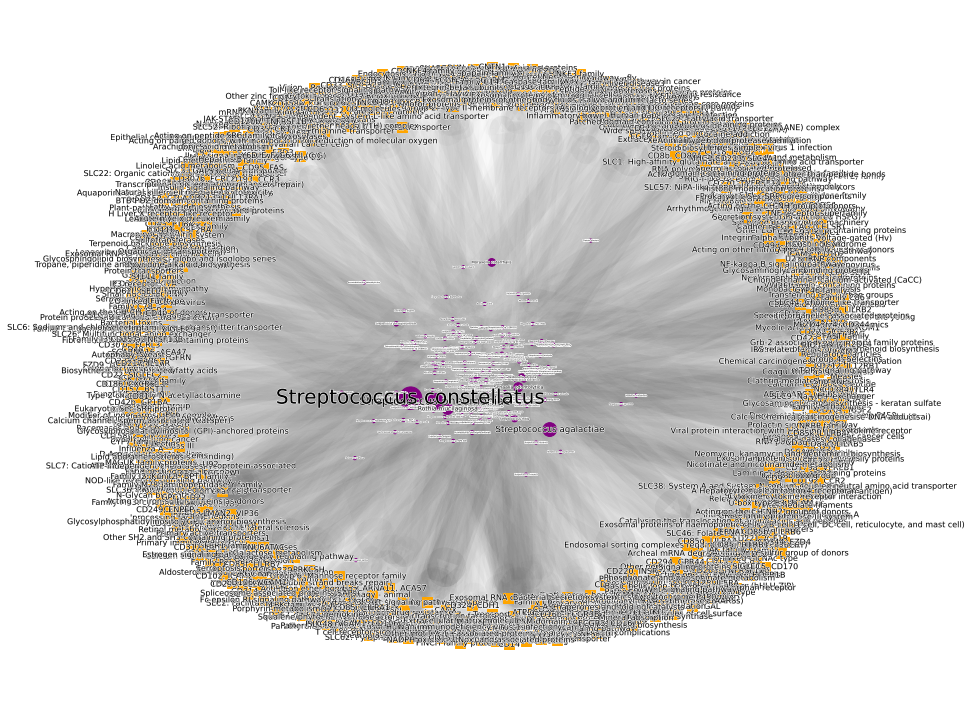

In [53]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.cm as cm
import matplotlib.patheffects as path_effects
import numpy as np

# Load data
#edges_df_cluster1 = pd.read_csv('edges_PD_cluster1_allpatients.csv', sep='\t')
mean_abundance = relative_abundance.mean(axis=1)
edges_df_cluster1['abundance_mean'] = edges_df_cluster1['start'].map(mean_abundance)
df = edges_df_cluster1.copy()

# Create directed graph
G = nx.DiGraph()

# Add nodes and edges
for _, row in df.iterrows():
    start = row['start']
    end = row['end']
    weight = row['weight']

    G.add_node(start, shape='circle')
    G.add_node(end, shape='square')
    G.add_edge(start, end, weight=weight)

# Separate node types
circle_nodes = [n for n, d in G.nodes(data=True) if d['shape'] == 'circle']
square_nodes = [n for n, d in G.nodes(data=True) if d['shape'] == 'square']

# Abundance info for all circle nodes
circle_abundance = {n: mean_abundance.get(n, 0) for n in circle_nodes}
abundance_vals = list(circle_abundance.values())
min_abun, max_abun = min(abundance_vals), max(abundance_vals)

# Scaling function
def scale_from_abundance(value, min_font, max_font, scaling_factor=2):
    if max_abun == min_abun:
        return (min_font + max_font) / 2
    scaled = (value - min_abun) / (max_abun - min_abun)
    return min_font + (scaled ** scaling_factor) * (max_font - min_font)

# Layout
pos = nx.spring_layout(G, seed=42)

# Edge settings
weights = [d['weight'] for _, _, d in G.edges(data=True)]
norm_edges = mcolors.Normalize(vmin=0, vmax=max(weights))
cmap = cm.Greys
edge_colors = [cmap(norm_edges(w)) for w in weights]

# Draw plot
plt.figure(figsize=(14, 10))

# Draw edges
nx.draw_networkx_edges(G, pos, width=weights, edge_color=edge_colors, alpha=0.06)

# === Draw square nodes ===
nx.draw_networkx_nodes(G, pos,
                       nodelist=square_nodes,
                       node_shape='s',
                       node_color='orange',
                       node_size=100)

# === Draw circle nodes, sort by abundance ===
sorted_circle_nodes = sorted(circle_nodes, key=lambda n: circle_abundance[n])
circle_sizes = [scale_from_abundance(circle_abundance[n], 10, 500) for n in sorted_circle_nodes]
nx.draw_networkx_nodes(G, pos,
                       nodelist=sorted_circle_nodes,
                       node_shape='o',
                       node_color='purple',
                       node_size=circle_sizes)

# === Label circle nodes: only top 50% by abundance ===
#threshold_abun = np.percentile(list(circle_abundance.values()), 50)
for node in sorted_circle_nodes:
    #if circle_abundance[node] < threshold_abun:
        #continue
    x, y = pos[node]
    abun = circle_abundance[node]
    font_size = scale_from_abundance(abun, 2, 20)
    color = 'black'

    text = plt.text(x, y, str(node), fontsize=font_size, color=color, ha='center', va='center')
    text.set_path_effects([
        path_effects.Stroke(linewidth=1, foreground='white'),
        path_effects.Normal()
    ])

# === Label square nodes with fixed font size ===
for node in square_nodes:
    x, y = pos[node]
    text = plt.text(x, y, str(node), fontsize=8, color='black', ha='center', va='center')
    text.set_path_effects([
        path_effects.Stroke(linewidth=1, foreground='white'),
        path_effects.Normal()
    ])

# Final touches
plt.axis('off')
plt.tight_layout()
plt.savefig('cluster1_network_all_nodes_0729.pdf', bbox_inches='tight')

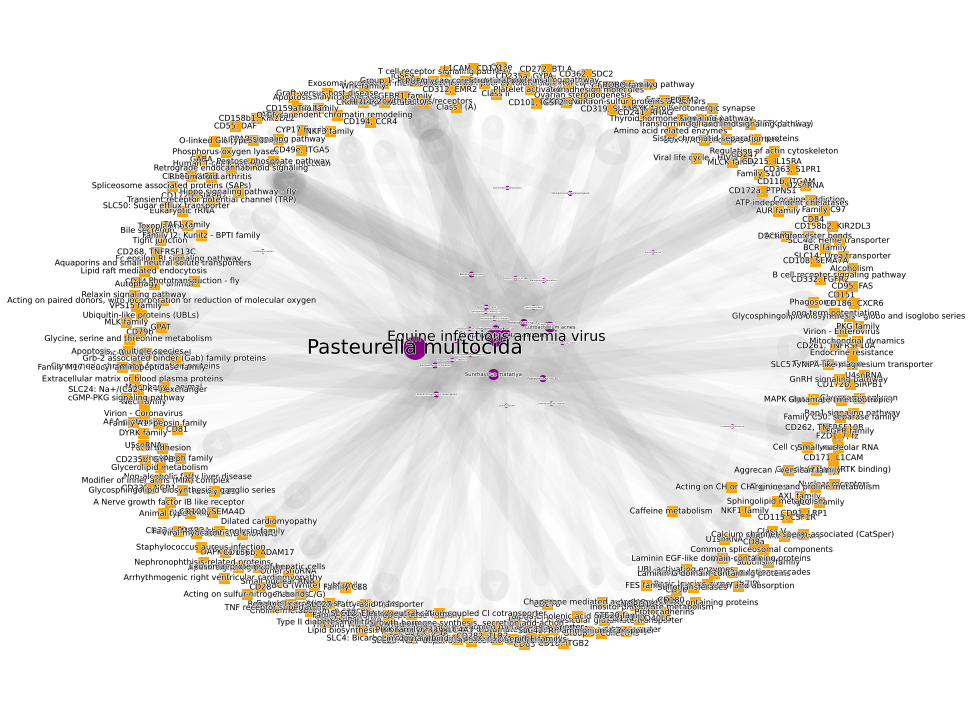

In [55]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.cm as cm
import matplotlib.patheffects as path_effects
import numpy as np

# Load data
edges_df_cluster2 = pd.read_csv('edges_PD_cluster2_allpatients.csv', sep='\t')
mean_abundance = relative_abundance.mean(axis=1)
edges_df_cluster2['abundance_mean'] = edges_df_cluster2['start'].map(mean_abundance)
#remove synthetic constuct
edges_df_cluster2 = edges_df_cluster2[edges_df_cluster2['start'] != 'synthetic construct']
df = edges_df_cluster2.copy()
# Create directed graph
G = nx.DiGraph()

# Add nodes and edges
for _, row in df.iterrows():
    start = row['start']
    end = row['end']
    weight = row['weight']

    G.add_node(start, shape='circle')
    G.add_node(end, shape='square')
    G.add_edge(start, end, weight=weight)

# Separate node types
circle_nodes = [n for n, d in G.nodes(data=True) if d['shape'] == 'circle']
square_nodes = [n for n, d in G.nodes(data=True) if d['shape'] == 'square']

# Abundance info for all circle nodes
circle_abundance = {n: mean_abundance.get(n, 0) for n in circle_nodes}
abundance_vals = list(circle_abundance.values())
min_abun, max_abun = min(abundance_vals), max(abundance_vals)

# Scaling function
def scale_from_abundance(value, min_font, max_font, scaling_factor=2):
    if max_abun == min_abun:
        return (min_font + max_font) / 2
    scaled = (value - min_abun) / (max_abun - min_abun)
    return min_font + (scaled ** scaling_factor) * (max_font - min_font)

# Layout
pos = nx.spring_layout(G, seed=42)

# Edge settings
weights = [d['weight'] for _, _, d in G.edges(data=True)]
norm_edges = mcolors.Normalize(vmin=0, vmax=max(weights))
cmap = cm.Greys
edge_colors = [cmap(norm_edges(w)) for w in weights]

# Draw plot
plt.figure(figsize=(14, 10))

# Draw edges
nx.draw_networkx_edges(G, pos, width=weights, edge_color=edge_colors, alpha=0.06)

# === Draw square nodes ===
nx.draw_networkx_nodes(G, pos,
                       nodelist=square_nodes,
                       node_shape='s',
                       node_color='orange',
                       node_size=100)

# === Draw circle nodes, sort by abundance ===
sorted_circle_nodes = sorted(circle_nodes, key=lambda n: circle_abundance[n])
circle_sizes = [scale_from_abundance(circle_abundance[n], 10, 500) for n in sorted_circle_nodes]
nx.draw_networkx_nodes(G, pos,
                       nodelist=sorted_circle_nodes,
                       node_shape='o',
                       node_color='purple',
                       node_size=circle_sizes)

# === Label circle nodes: only top 50% by abundance ===
#threshold_abun = np.percentile(list(circle_abundance.values()), 50)
for node in sorted_circle_nodes:
    #if circle_abundance[node] < threshold_abun:
        #continue
    x, y = pos[node]
    abun = circle_abundance[node]
    font_size = scale_from_abundance(abun, 2, 20)
    color = 'black'

    text = plt.text(x, y, str(node), fontsize=font_size, color=color, ha='center', va='center')
    text.set_path_effects([
        path_effects.Stroke(linewidth=1, foreground='white'),
        path_effects.Normal()
    ])

# === Label square nodes with fixed font size ===
for node in square_nodes:
    x, y = pos[node]
    text = plt.text(x, y, str(node), fontsize=8, color='black', ha='center', va='center')
    text.set_path_effects([
        path_effects.Stroke(linewidth=1, foreground='white'),
        path_effects.Normal()
    ])

# Final touches
plt.axis('off')
plt.tight_layout()
plt.savefig('cluster2_network_all_nodes_0729.pdf', bbox_inches='tight')

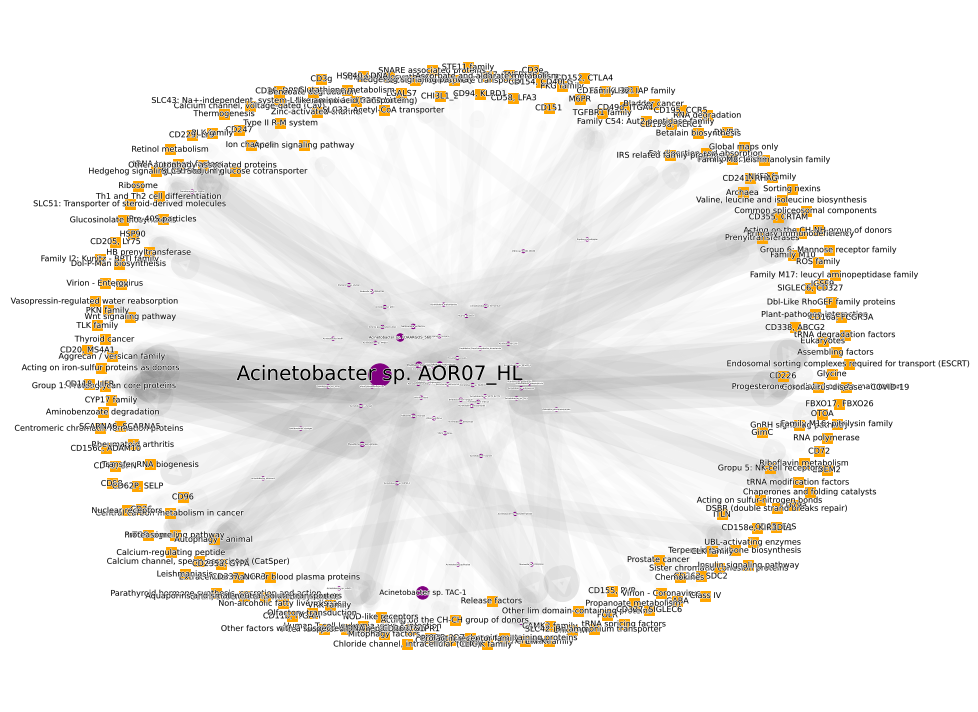

In [56]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.cm as cm
import matplotlib.patheffects as path_effects
import numpy as np

# Load data
edges_df_cluster3 = pd.read_csv('edges_PD_cluster3_allpatients.csv', sep='\t')
mean_abundance = relative_abundance.mean(axis=1)
edges_df_cluster3['abundance_mean'] = edges_df_cluster3['start'].map(mean_abundance)
df = edges_df_cluster3.copy()

# Create directed graph
G = nx.DiGraph()

# Add nodes and edges
for _, row in df.iterrows():
    start = row['start']
    end = row['end']
    weight = row['weight']

    G.add_node(start, shape='circle')
    G.add_node(end, shape='square')
    G.add_edge(start, end, weight=weight)

# Separate node types
circle_nodes = [n for n, d in G.nodes(data=True) if d['shape'] == 'circle']
square_nodes = [n for n, d in G.nodes(data=True) if d['shape'] == 'square']

# Abundance info for all circle nodes
circle_abundance = {n: mean_abundance.get(n, 0) for n in circle_nodes}
abundance_vals = list(circle_abundance.values())
min_abun, max_abun = min(abundance_vals), max(abundance_vals)

# Scaling function
def scale_from_abundance(value, min_font, max_font, scaling_factor=2):
    if max_abun == min_abun:
        return (min_font + max_font) / 2
    scaled = (value - min_abun) / (max_abun - min_abun)
    return min_font + (scaled ** scaling_factor) * (max_font - min_font)

# Layout
pos = nx.spring_layout(G, seed=42)

# Edge settings
weights = [d['weight'] for _, _, d in G.edges(data=True)]
norm_edges = mcolors.Normalize(vmin=0, vmax=max(weights))
cmap = cm.Greys
edge_colors = [cmap(norm_edges(w)) for w in weights]

# Draw plot
plt.figure(figsize=(14, 10))

# Draw edges
nx.draw_networkx_edges(G, pos, width=weights, edge_color=edge_colors, alpha=0.06)

# === Draw square nodes ===
nx.draw_networkx_nodes(G, pos,
                       nodelist=square_nodes,
                       node_shape='s',
                       node_color='orange',
                       node_size=100)

# === Draw circle nodes, sort by abundance ===
sorted_circle_nodes = sorted(circle_nodes, key=lambda n: circle_abundance[n])
circle_sizes = [scale_from_abundance(circle_abundance[n], 10, 500) for n in sorted_circle_nodes]
nx.draw_networkx_nodes(G, pos,
                       nodelist=sorted_circle_nodes,
                       node_shape='o',
                       node_color='purple',
                       node_size=circle_sizes)

# === Label circle nodes: only top 50% by abundance ===
#threshold_abun = np.percentile(list(circle_abundance.values()), 50)
for node in sorted_circle_nodes:
    #if circle_abundance[node] < threshold_abun:
        #continue
    x, y = pos[node]
    abun = circle_abundance[node]
    font_size = scale_from_abundance(abun, 2, 20)
    color = 'black'

    text = plt.text(x, y, str(node), fontsize=font_size, color=color, ha='center', va='center')
    text.set_path_effects([
        path_effects.Stroke(linewidth=1, foreground='white'),
        path_effects.Normal()
    ])

# === Label square nodes with fixed font size ===
for node in square_nodes:
    x, y = pos[node]
    text = plt.text(x, y, str(node), fontsize=8, color='black', ha='center', va='center')
    text.set_path_effects([
        path_effects.Stroke(linewidth=1, foreground='white'),
        path_effects.Normal()
    ])

# Final touches
plt.axis('off')
plt.tight_layout()
plt.savefig('cluster3_network_all_nodes_0729.pdf', bbox_inches='tight')